In [1]:
import sys
import numpy as np

from debug import parser

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
par = parser.EventParser("../debug-data/debug_cori", "debug_345.txt")

In [3]:
es = par.parse()

In [4]:
es

Events on 345: [
Event(1586929510.369, 1586929534.684)
  +-> spotfind_start = 1586929520.377
  +-> index_start = 1586929521.097
  +-> hostname = nid02610
  +-> psanats = 1970-01-01T00:00Z00.000
  +-> status = stop
  +-> is locked = True
Event(1586929537.292, 1586929564.916)
  +-> spotfind_start = 1586929547.245
  +-> index_start = 1586929547.589
  +-> refine_start = 1586929564.248
  +-> integrate_start = 1586929564.251
  +-> hostname = nid02610
  +-> psanats = 1970-01-01T00:00Z00.000
  +-> status = done
  +-> is locked = True
Event(1586929567.428, 1586929594.498)
  +-> spotfind_start = 1586929577.6
  +-> index_start = 1586929577.918
  +-> refine_start = 1586929593.905
  +-> integrate_start = 1586929593.908
  +-> hostname = nid02610
  +-> psanats = 1970-01-01T00:00Z00.000
  +-> status = done
  +-> is locked = True
Event(1586929597.103, 1586929624.117)
  +-> spotfind_start = 1586929607.274
  +-> index_start = 1586929607.544
  +-> refine_start = 1586929623.507
  +-> integrate_start = 1586

In [5]:
ev = es[2]

In [6]:
ev

Event(1586929567.428, 1586929594.498)
  +-> spotfind_start = 1586929577.6
  +-> index_start = 1586929577.918
  +-> refine_start = 1586929593.905
  +-> integrate_start = 1586929593.908
  +-> hostname = nid02610
  +-> psanats = 1970-01-01T00:00Z00.000
  +-> status = done
  +-> is locked = True

In [7]:
ev.event_order

['spotfind_start', 'index_start', 'refine_start', 'integrate_start']

In [8]:
ev.event_offsets

[10.17199993133545, 10.490000009536743, 26.47699999809265, 26.480000019073486]

In [9]:
a = [1, 2, 3, 4]

In [10]:
a[1:-1]

[2, 3]

In [11]:
len(es)

9

In [12]:
debug_parser = parser.DebugParser("../debug-data/debug_cori")

In [13]:
ds = debug_parser.parse()

Skipping: EventParser(../debug-data/debug_cori, run.json | False)


In [14]:
ds

DirectoryStream(../debug-data/debug_cori):
 +-> containing 65822 EventStreams
 |=> first Event:Event(1586929509.971, 1586929535.992)
  +-> spotfind_start = 1586929519.924
  +-> index_start = 1586929520.667
  +-> refine_start = 1586929535.314
  +-> integrate_start = 1586929535.318
  +-> hostname = nid02612
  +-> psanats = 1970-01-01T00:00Z00.000
  +-> status = done
  +-> is locked = True

In [15]:
ds.compute_stats()

In [22]:
gdiff_pdf, gdiff_bins = np.histogram(ds.good_diff, bins=100, density=True)
gdur_pdf,  gdur_bins  = np.histogram(ds.good_duration, bins=100, density=True)

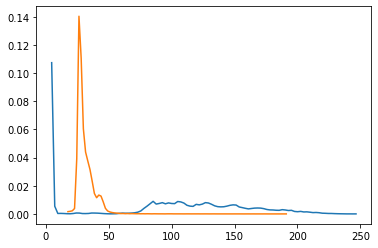

In [23]:
plot(gdiff_bins[:-1] + diff(gdiff_bins), gdiff_pdf)
plot(gdur_bins[:-1]  + diff(gdur_bins),  gdur_pdf)

In [24]:
fdiff_pdf, fdiff_bins = np.histogram(ds.failed_diff, bins=100, density=True)
fdur_pdf,  fdur_bins  = np.histogram(ds.failed_duration, bins=100, density=True)

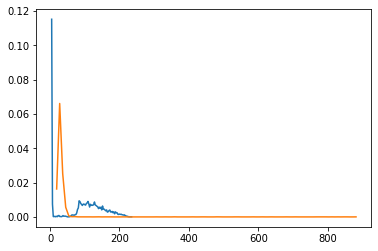

In [25]:
plot(fdiff_bins[:-1] + diff(fdiff_bins), fdiff_pdf)
plot(fdur_bins[:-1]  + diff(fdur_bins),  fdur_pdf)

In [26]:
ev

Event(1586929567.428, 1586929594.498)
  +-> spotfind_start = 1586929577.6
  +-> index_start = 1586929577.918
  +-> refine_start = 1586929593.905
  +-> integrate_start = 1586929593.908
  +-> hostname = nid02610
  +-> psanats = 1970-01-01T00:00Z00.000
  +-> status = done
  +-> is locked = True

In [31]:
ev.event_offsets

[10.17199993133545, 10.490000009536743, 26.47699999809265, 26.480000019073486]

In [48]:
goffset_1 = list()
goffset_2 = list()
goffset_3 = list()
foffset_1 = list()
gcompute  = list()
isgood   = lambda x: x.status == "done"

for es in ds.event_streams:
    for ev in es:
        if isgood(ev):
            goffset_1.append(ev.event_offsets[0])
            goffset_2.append(ev.event_offsets[1])
            goffset_3.append(ev.event_offsets[2])
            gcompute.append(ev.event_offsets[-1] - ev.event_offsets[0])
        else:
            foffset_1.append(ev.event_offsets[0])

In [49]:
goffset_1_pdf, goffset_1_bins  = np.histogram(goffset_1, bins=100, density=True)
goffset_2_pdf, goffset_2_bins  = np.histogram(goffset_2, bins=100, density=True)
goffset_3_pdf, goffset_3_bins  = np.histogram(goffset_3, bins=100, density=True)
foffset_1_pdf, foffset_1_bins  = np.histogram(foffset_1, bins=100, density=True)
gcompute_pdf,  gcompute_1_bins = np.histogram(gcompute,  bins=100, density=True)

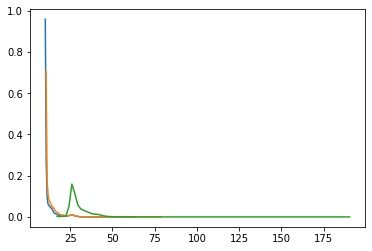

In [52]:
plot(goffset_1_bins[:-1]  + diff(goffset_1_bins),  goffset_1_pdf)
plot(goffset_2_bins[:-1]  + diff(goffset_2_bins),  goffset_2_pdf)
plot(goffset_3_bins[:-1]  + diff(goffset_3_bins),  goffset_3_pdf)
plot(gcompute_1_bins[:-1] + diff(gcompute_1_bins), gcompute_pdf)

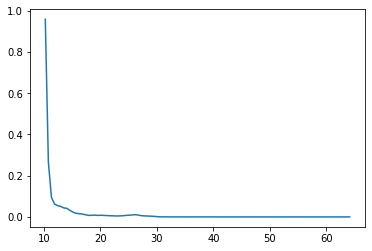

In [62]:
plot(goffset_1_bins[:-1]  + diff(goffset_1_bins),  goffset_1_pdf)

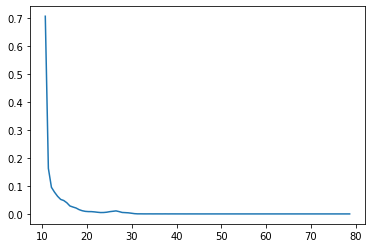

In [63]:
plot(goffset_2_bins[:-1]  + diff(goffset_2_bins),  goffset_2_pdf)

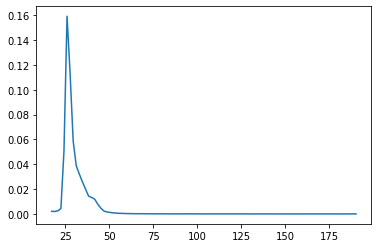

In [56]:
plot(goffset_3_bins[:-1]  + diff(goffset_3_bins),  goffset_3_pdf)

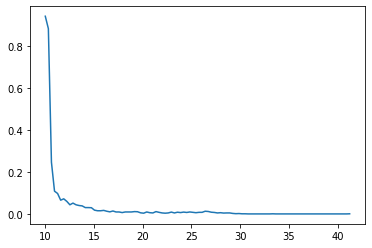

In [57]:
plot(foffset_1_bins[:-1]  + diff(foffset_1_bins),  foffset_1_pdf)